In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data=sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
duplicated_rows= data.duplicated()

In [7]:
duplicated_rows.sum()

107

In [9]:
data.shape

(891, 15)

In [11]:
data=data[~duplicated_rows]

In [13]:
data.shape

(784, 15)

In [15]:
data1 = data.drop(['who', 'alive'], axis=1)
data1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,True


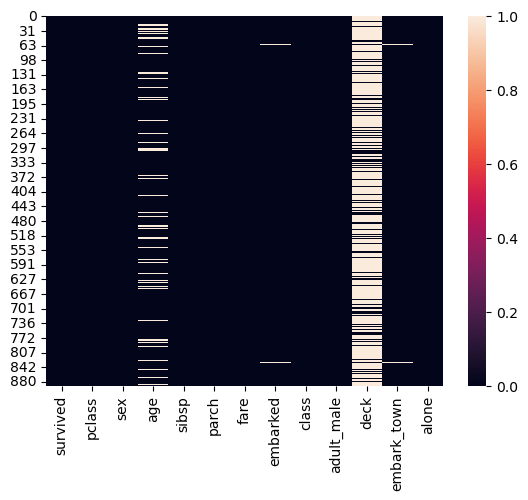

In [17]:
# Checking missing values
sns.heatmap(data1.isna())
plt.show()

In [19]:
data1=data1.drop(['deck'],axis=1) # removing the column 'deck' which has a lot of missing values. 
data1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton,True


In [21]:
data1.isna().sum() 

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
adult_male       0
embark_town      2
alone            0
dtype: int64

In [23]:
# Handling missing values
num_df=data1.select_dtypes(include="number")
cat_df=data1.select_dtypes(include="object_")

In [25]:
print("Numerical columns are")
num_cols =num_df.columns.tolist()
print(num_cols)

cat_cols =cat_df.columns.tolist()
print("Categorical columns are")
print(cat_cols)


Numerical columns are
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
Categorical columns are
['sex', 'embarked', 'embark_town']


In [27]:
num_df.isna().sum()

survived      0
pclass        0
age         106
sibsp         0
parch         0
fare          0
dtype: int64

In [29]:
for col in num_cols:
    num_df[col]=num_df[col].fillna(num_df[col].median())

In [31]:
num_df.isna().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [33]:
for col in cat_cols:
    cat_df[col]=cat_df[col].fillna(cat_df[col].mode()[0])

In [35]:
cat_df.isna().sum()

sex            0
embarked       0
embark_town    0
dtype: int64

In [37]:
data2 = pd.concat([num_df,cat_df], axis=1)

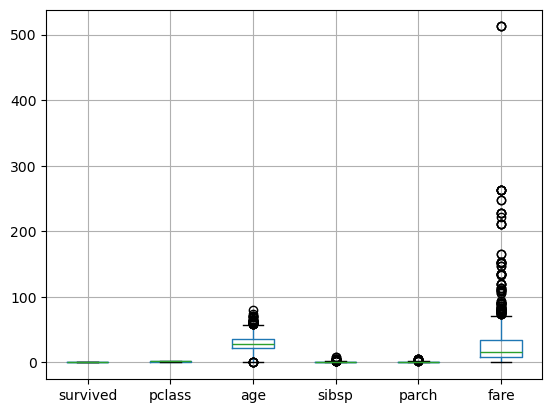

In [39]:
# Outlier Handling
num_df.boxplot()
plt.show()

In [41]:
def remove_outliers(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    iqr=q3-q1
    upper_bound=q3 + 1.5 *iqr
    lower_bound=q1 - 1.5 *iqr
    df[column_name]=df[column_name].clip(upper=upper_bound)# clip function bounds the outliers to upper bound
    df[column_name]=df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [43]:
for col in num_cols:
    num_df[col]=remove_outliers(num_df,col)

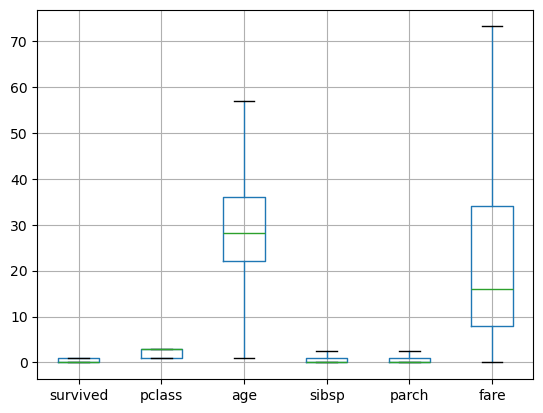

In [45]:
num_df.boxplot()
plt.show()

In [47]:
data2 = pd.concat([num_df,cat_df], axis=1)

In [49]:
#Checking data imbalance
data2['embark_town'].value_counts()

embark_town
Southampton    570
Cherbourg      155
Queenstown      59
Name: count, dtype: int64

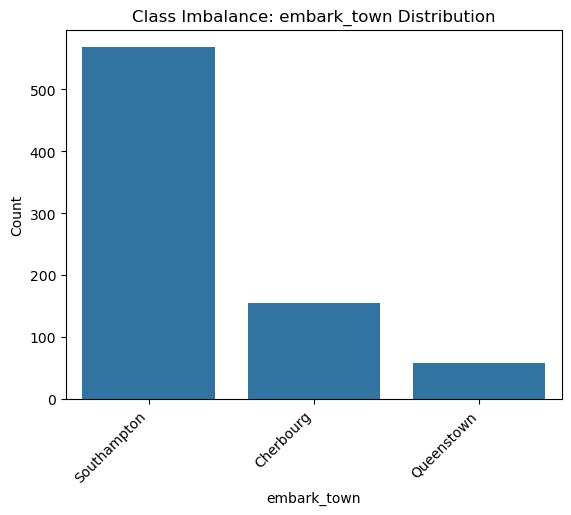

In [51]:
sns.countplot(x='embark_town',data=data)
plt.title('Class Imbalance: embark_town Distribution')
plt.xlabel('embark_town')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()

In [53]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
X=data2.drop('embark_town',axis=1)
y=data2['embark_town']
oversampler= RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X,y)

In [55]:
balanced_data= pd.DataFrame(X_resampled,columns=X.columns)
balanced_data['embark_town']=y_resampled
print(balanced_data['embark_town'].value_counts())

embark_town
Southampton    570
Cherbourg      570
Queenstown     570
Name: count, dtype: int64


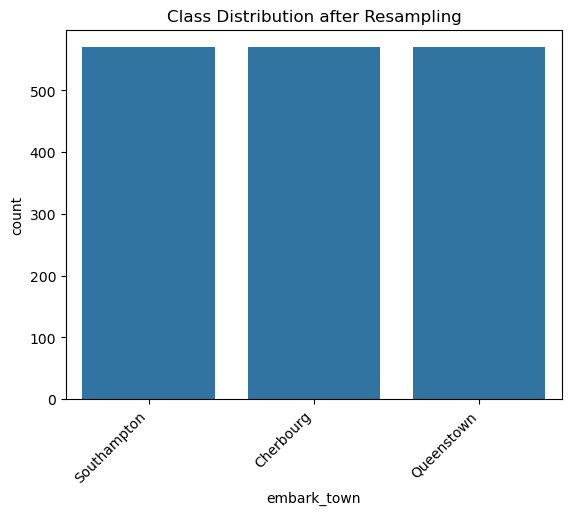

In [57]:
sns.countplot(x='embark_town',data=balanced_data)
plt.title('Class Distribution after Resampling')
plt.xlabel('embark_town')
plt.ylabel('count')
plt.xticks(rotation=45,ha='right') 
plt.show()

In [59]:
# label encoding
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

label_enc = LabelEncoder()
data2['embarked_encoded'] = label_enc.fit_transform(data2['embarked']) # label encoding is done based on the alphabetic order.
data2

,survived,pclass,age,sibsp,parch,fare,sex,embarked,embark_town,embarked_encoded
0,0,3,22.00,1.0,0.0,7.2500,male,S,Southampton,2
1,1,1,38.00,1.0,0.0,71.2833,female,C,Cherbourg,0
2,1,3,26.00,0.0,0.0,7.9250,female,S,Southampton,2
3,1,1,35.00,1.0,0.0,53.1000,female,S,Southampton,2
4,0,3,35.00,0.0,0.0,8.0500,male,S,Southampton,2
...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.00,0.0,2.5,29.1250,female,Q,Queenstown,1
887,1,1,19.00,0.0,0.0,30.0000,female,S,Southampton,2
888,0,3,28.25,1.0,2.0,23.4500,female,S,Southampton,2
889,1,1,26.00,0.0,0.0,30.0000,male,C,Cherbourg,0


In [61]:
# ordinal encoding
pclass_order = [1,2,3]
ordinal_enc=OrdinalEncoder(categories=[pclass_order])
data2['pclass_encoded']=ordinal_enc.fit_transform(data2[['pclass']])
data2

,survived,pclass,age,sibsp,parch,fare,sex,embarked,embark_town,embarked_encoded,pclass_encoded
0,0,3,22.00,1.0,0.0,7.2500,male,S,Southampton,2,2.0
1,1,1,38.00,1.0,0.0,71.2833,female,C,Cherbourg,0,0.0
2,1,3,26.00,0.0,0.0,7.9250,female,S,Southampton,2,2.0
3,1,1,35.00,1.0,0.0,53.1000,female,S,Southampton,2,0.0
4,0,3,35.00,0.0,0.0,8.0500,male,S,Southampton,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.00,0.0,2.5,29.1250,female,Q,Queenstown,1,2.0
887,1,1,19.00,0.0,0.0,30.0000,female,S,Southampton,2,0.0
888,0,3,28.25,1.0,2.0,23.4500,female,S,Southampton,2,2.0
889,1,1,26.00,0.0,0.0,30.0000,male,C,Cherbourg,0,0.0


In [67]:
# One hot encoding
color_onehot = pd.get_dummies(data2['embark_town']) 
color_onehot

,Cherbourg,Queenstown,Southampton
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
885,False,True,False
887,False,False,True
888,False,False,True
889,True,False,False


In [71]:
color_onehot = pd.get_dummies(data2,columns=['embark_town'],dtype=int) 
color_onehot

,survived,pclass,age,sibsp,parch,fare,sex,embarked,embarked_encoded,pclass_encoded,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.00,1.0,0.0,7.2500,male,S,2,2.0,0,0,1
1,1,1,38.00,1.0,0.0,71.2833,female,C,0,0.0,1,0,0
2,1,3,26.00,0.0,0.0,7.9250,female,S,2,2.0,0,0,1
3,1,1,35.00,1.0,0.0,53.1000,female,S,2,0.0,0,0,1
4,0,3,35.00,0.0,0.0,8.0500,male,S,2,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.00,0.0,2.5,29.1250,female,Q,1,2.0,0,1,0
887,1,1,19.00,0.0,0.0,30.0000,female,S,2,0.0,0,0,1
888,0,3,28.25,1.0,2.0,23.4500,female,S,2,2.0,0,0,1
889,1,1,26.00,0.0,0.0,30.0000,male,C,0,0.0,1,0,0


In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
std_scalar= StandardScaler()
df['price_std_scaled'] = std_scalar.fit_transform(df[['Price']])
df.head()